# Pixel Operations

1. Color space conversion: RGB and HSV
1. Negation in RGB and HSV
1. Color rotation
1. Bit planes of gray scale images

In [1]:
import numpy as np
import imageio
import skimage
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Color space conversion: RGB - HSV

- https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py

- Bit resolution is important. UInt8 is the default bit format for an image. Do not assume it will be automatically Uint8. Make this specification explicit! 

In [2]:
from skimage import color

(1, 9, 3)

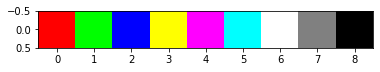

In [3]:
cim255 = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255],
                    [255, 255, 0], [255, 0, 255], [0, 255, 255], 
                    [255, 255, 255], [128, 128, 128], [0, 0, 0]]], 
                dtype='uint8')

cnames = ['red', 'green', 'blue', 
          'yellow', 'magenta', 'cyan', 
          'white', 'gray', 'black']

plt.imshow(cim255)
cim255.shape 

In [4]:
# this is opencv version. default output is 255 uint8
cv2.cvtColor(cim255, cv2.COLOR_RGB2HSV)

array([[[  0, 255, 255],
        [ 60, 255, 255],
        [120, 255, 255],
        [ 30, 255, 255],
        [150, 255, 255],
        [ 90, 255, 255],
        [  0,   0, 255],
        [  0,   0, 128],
        [  0,   0,   0]]], dtype=uint8)

In [5]:
# now come back to skimage
hsv = color.rgb2hsv(cim255)
hsv 

array([[[0.        , 1.        , 1.        ],
        [0.33333333, 1.        , 1.        ],
        [0.66666667, 1.        , 1.        ],
        [0.16666667, 1.        , 1.        ],
        [0.83333333, 1.        , 1.        ],
        [0.5       , 1.        , 1.        ],
        [0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.50196078],
        [0.        , 0.        , 0.        ]]])

RGB ->  HSV
red        : [0. 1. 1.]
green      : [0.33 1.   1.  ]
blue       : [0.67 1.   1.  ]
yellow     : [0.17 1.   1.  ]
magenta    : [0.83 1.   1.  ]
cyan       : [0.5 1.  1. ]
white      : [0. 0. 1.]
gray       : [0.  0.  0.5]
black      : [0. 0. 0.]


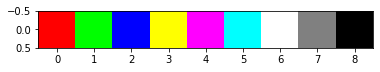

In [6]:
print('RGB ->  HSV')
for i in range(len(cnames)):
    print(f'{cnames[i]:10} : {np.round(hsv[0,i], 2)}')
plt.imshow(cim255);

In [7]:
# HSV -> RGB come back
rgb = color.hsv2rgb(hsv)
rgb, type(rgb), rgb.dtype 

(array([[[1.        , 0.        , 0.        ],
         [0.        , 1.        , 0.        ],
         [0.        , 0.        , 1.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 0.        , 1.        ],
         [0.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.50196078, 0.50196078, 0.50196078],
         [0.        , 0.        , 0.        ]]]),
 numpy.ndarray,
 dtype('float64'))

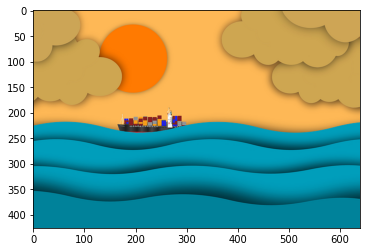

In [8]:
# Now let's use an image
imfile = 'pixels/image-15.png'
im = imageio.imread(imfile)  # RGB
plt.imshow(im);

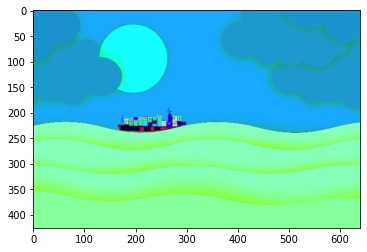

In [9]:
# RGB -> HSV
imhsv = color.rgb2hsv(im)
# display as if it was an RGB
plt.imshow(imhsv);

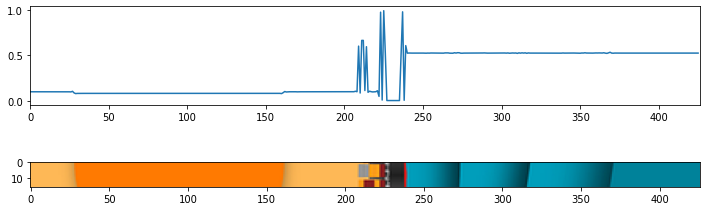

In [10]:
# Hue plot along x = 200
fig, axes = plt.subplots(2,1, figsize=(12,4))
axes[0].plot(imhsv[:,200, 0])
axes[0].set(xlim=[0, imhsv.shape[0]])
im200 = im[:,195:211,:]  # a little bit larger for better visual inspection
axes[1].imshow(im200.transpose(1,0,2));

- Red/yellow colors about 0.1 ~ 0.2 hue values
- Blue region has the same hue despite its variation in brightness

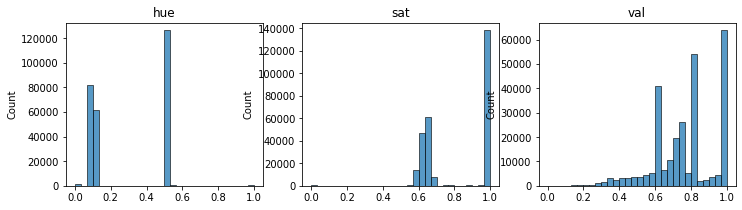

In [11]:
# histogram of HSV channels
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i, chname in enumerate(['hue', 'sat', 'val']):
    sns.histplot(imhsv[:,:,i].reshape(-1), bins=30, ax=axes[i])
    axes[i].set(title=chname)

- saturation about 1.0 means there are many pixels whose color purity is high.

## Tinting Gray-Scale Images

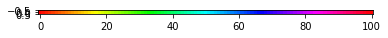

In [12]:
hue_gradient = np.linspace(0, 1, 101)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

plt.imshow(all_hues)

(512, 512) uint8


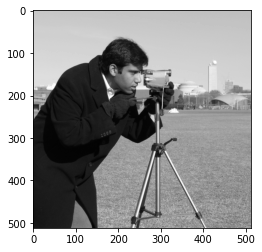

In [13]:
# Tinting Gray-scale Images
# https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py

gray = skimage.data.camera()
print(gray.shape, gray.dtype)
plt.imshow(gray, cmap='gray');

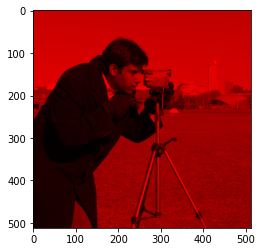

In [14]:
# we use the gray image as value component in HSV
gray1 = gray/255.
hsv = np.zeros((gray.shape[0], gray.shape[1], 3))
hsv[:,:,2] = gray1 
hsv[:,:,0] = 0  # red
hsv[:,:,1] = 1

rgb = color.hsv2rgb(hsv)
plt.imshow(rgb);

In [23]:
# we use the gray image as value component in HSV
def colorize(gray, hue, sat, return_hsv=False):
    # gray: gray scale image of shape (r, c) in uint8 
    # hue, sat : any value in [0, 1] for hue and saturation

    gray1 = gray/255.
    hsv = np.zeros((gray.shape[0], gray.shape[1], 3))
    hsv[:,:,2] = gray1 
    hsv[:,:,0] = hue 
    hsv[:,:,1] = sat

    rgb = color.hsv2rgb(hsv)

    if not return_hsv:
        return rgb 
    else:
        return rgb, hsv 

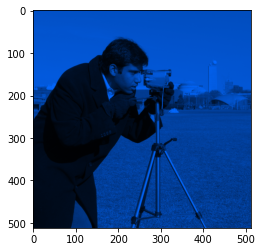

In [16]:
a = colorize(gray, hue=0.6, sat=0.99)
plt.imshow(a);

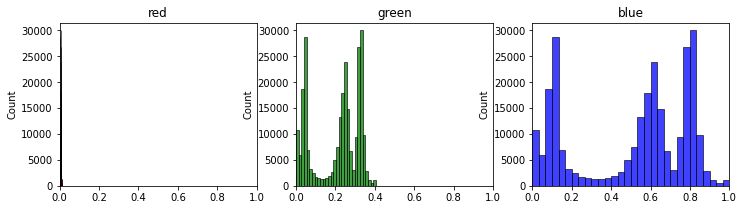

In [17]:
# histogram of HSV channels
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i, chname in enumerate(['red', 'green', 'blue']):
    sns.histplot(a[:,:,i].reshape(-1), bins=30, ax=axes[i], color=chname)
    axes[i].set(title=chname, xlim=[0,1])

<AxesSubplot:ylabel='Count'>

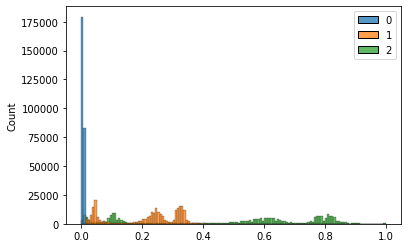

In [18]:
sns.histplot(a.reshape(-1,3))

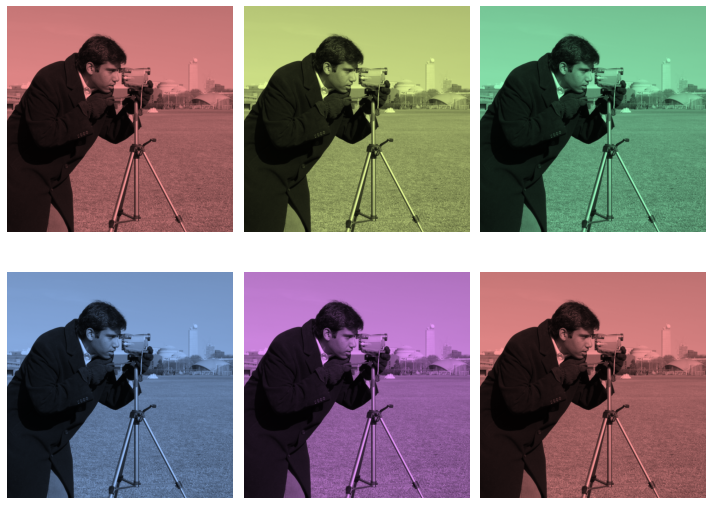

In [19]:
fig, axes = plt.subplots(2,3, sharex=True, sharey=True, figsize=(10,8))

hue_values = np.linspace(0, 1, 6)
for ax, hue in zip(axes.flat, hue_values):
    tinted = colorize(gray, hue, sat=0.4)
    ax.imshow(tinted)
    ax.set_axis_off()
fig.tight_layout()

In [20]:
# save to a png file

imageio.imwrite('tinted.png', tinted)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [21]:
tinted = colorize(gray, hue=.3, sat=0.3)

print('src data type: ', tinted.dtype, tinted.min(), tinted.max())
tinted = skimage.img_as_ubyte(tinted)
print('con data type: ', tinted.dtype, tinted.min(), tinted.max())
imageio.imwrite('tinted.png', tinted)

src data type:  float64 0.0 1.0
con data type:  uint8 0 255


In [24]:
tinted = colorize(gray, hue=.3, sat=0.3)
# we know the range of the pixel values is [0, 1]
print('src data type: ', tinted.dtype, tinted.min(), tinted.max())
tinted = (tinted * 255).astype(np.uint8)
print('con data type: ', tinted.dtype, tinted.min(), tinted.max())
imageio.imwrite('tinted.png', tinted)

src data type:  float64 0.0 1.0
con data type:  uint8 0 255


In [30]:
def plotims(ims):
    fig, axes = plt.subplots(1, len(ims), figsize=(12,4))
    for i in range(len(ims)):
        axes[i].imshow(ims[i])
    return

## Color rotation

hsv256: uint8, (512, 512, 3)  0  255


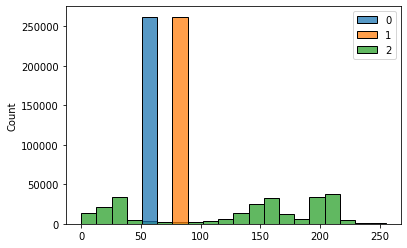

In [99]:
rgb, hsv = colorize(gray, hue=.2, sat=0.35, return_hsv=True)
hsv256 = skimage.img_as_ubyte(hsv) 
print(f'hsv256: {hsv256.dtype}, {hsv256.shape}  {hsv256.min()}  {hsv256.max()}')
sns.histplot(hsv256[:,:,:].reshape(-1, 3), bins=20);

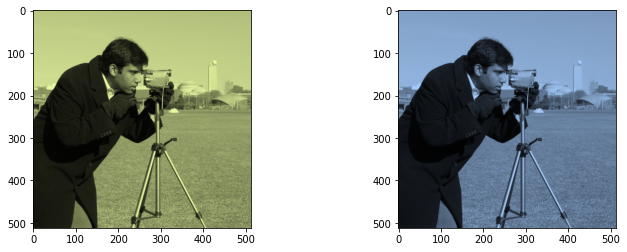

In [101]:
hsv256_2 = hsv256.copy() 
hsv256_2[:,:,0] = (hsv256_2[:,:,0] + 100) % 256  # circulate
plotims([rgb, 
        skimage.img_as_ubyte(color.hsv2rgb(hsv256_2))])

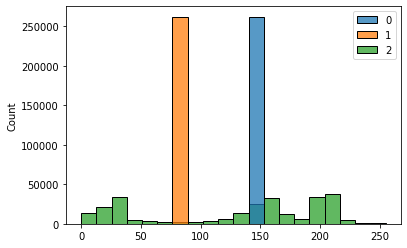

In [102]:
sns.histplot(hsv256_2[:,:,:].reshape(-1, 3), bins=20);

### Color rotation, movie

In [81]:
im = imageio.imread(imfile)  # read in an image file
hsv_src = skimage.img_as_ubyte(color.rgb2hsv(im))  # rgb -> hsv -> hsv256
shifted = hsv_src.copy()                           # destination
step = 1                                           # hue step
for i in range(256000):  # repeat many times
    # shifted[:,200:,0] = (hsv_src[:,200:,0] + i*step) % 256  # change Hue channel
    shifted[:,:,0] = (hsv_src[:,:,0] + i*step) % 256  # change Hue channel, cyclic
    shifted_rgb = color.hsv2rgb(shifted)              # hsv -> rgb, don't forget
    shifted_rgb = shifted_rgb[:,:,::-1]               # RGB -> BGR for cv2 interface
    shifted_rgb = skimage.img_as_ubyte(shifted_rgb)   # BGR 256 uint8 type
    cv2.putText(shifted_rgb,                          # draw a text, PIL also provides this function.
                f'{i*step:3}', 
                org=(20,im.shape[0]), 
                fontFace=cv2.FONT_HERSHEY_PLAIN, 
                fontScale=5, 
                color=(220,220,0), 
                thickness=4)
    cv2.imshow('win', shifted_rgb)       # display image in the window
    if cv2.waitKey(10) == 27: break      # if ESC pressed? then stop
#
cv2.destroyAllWindows()                  # kill the display window

---
# Bitplanes

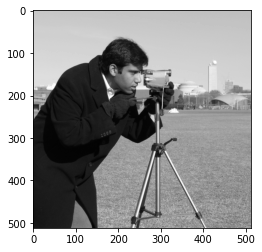

In [82]:
plt.imshow(gray, cmap='gray')

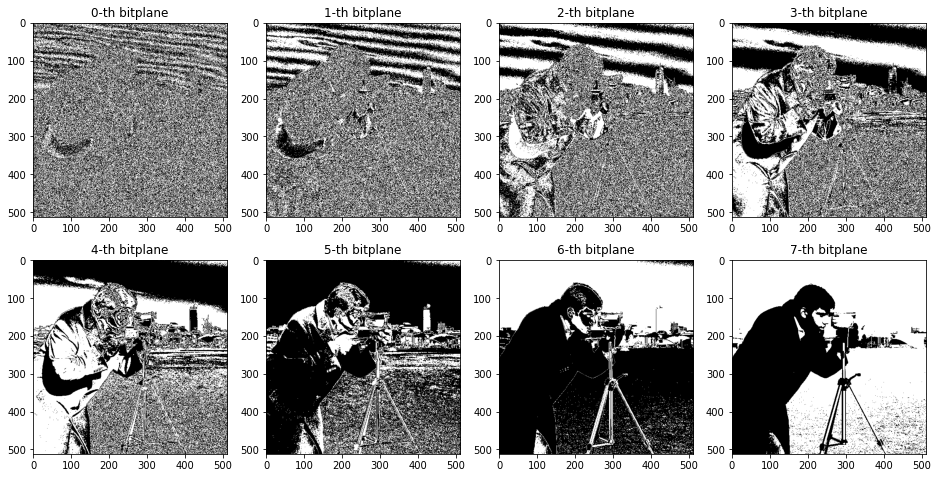

In [91]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
b = 1
for i, ax in zip(range(8), axes.flat):
    bitplane = np.bitwise_and(gray, 2**i)
    ax.imshow(bitplane, cmap='gray')
    ax.set(title=f'{i}-th bitplane')

---
End.